# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [46]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [47]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [48]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [43,211,427]#[43,211,377]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
# samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = False)

print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,630,11095,23998,787,9529,72
1,12119,28326,39694,4736,19410,2870
2,31012,16687,5429,15082,439,1163


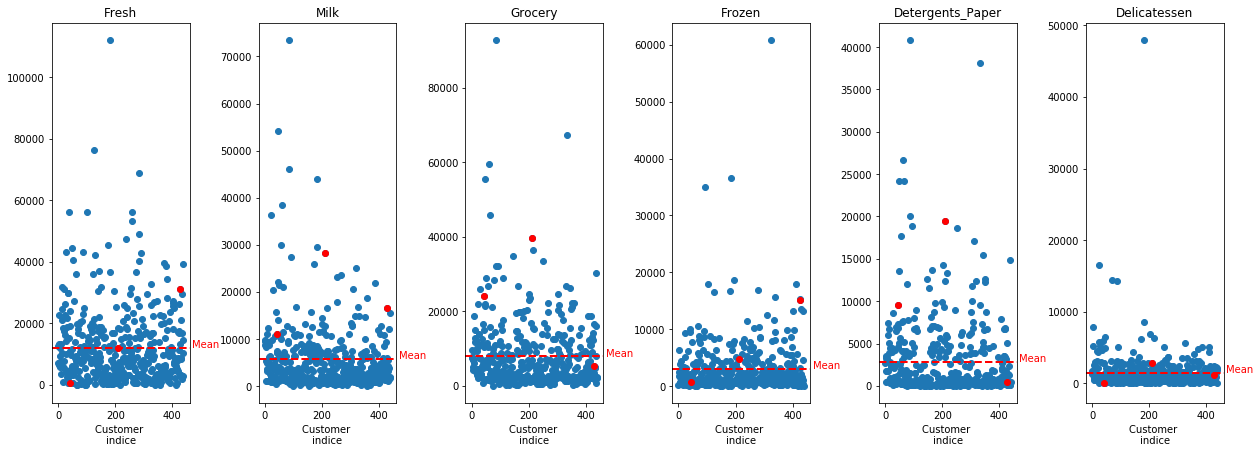

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
43,630.0,11095.00,23998.00,787.00,9529.00,72.00
211,12119.0,28326.00,39694.00,4736.00,19410.00,2870.00
427,31012.0,16687.00,5429.00,15082.00,439.00,1163.00
Mean,12000.3,5796.27,7951.28,3071.93,2881.49,1524.87


In [49]:
# Check indices among data
import matplotlib.pyplot as plt
import numpy as np
# Check selected indices
indices_check = [43,211,427] #[183,129,400]
# Create a DataFrame of the chosen samples
samples_check = pd.DataFrame(data.loc[indices_check], columns = data.keys())
#-----------------
# Create figure
fig, ax = plt.subplots(1, len(data.keys()), figsize = (21,7))
# Plot data
for k, ProductCat in enumerate(data.keys()):
    ax[k].scatter(np.arange(0,data.shape[0],1),data[ProductCat].values)
    ax[k].scatter(indices_check,samples_check[ProductCat].values,color='r')
    ax[k].axhline(np.mean(data[ProductCat].values),linestyle='--',linewidth=2, color='r',)
    ax[k].text(470, np.mean(data[ProductCat].values), "Mean", size=10, color='r')     
    ax[k].set_title(ProductCat)
    ax[k].set_xlabel('Customer \nindice')
    # ax[k].set_ylabel('annual spending amounts', multialignment='center')
fig.subplots_adjust(wspace=0.5)
plt.show()
#-----------------
# 
MeanData=[np.mean(data[ProductCat].values) for ProductCat in data.keys() ]
MeanData=np.reshape(np.asarray(MeanData),(1,6))
df2 = pd.DataFrame(MeanData ,index = ['Mean'], columns = data.keys())
display(pd.concat([samples_check.round(2), df2.round(2)]))


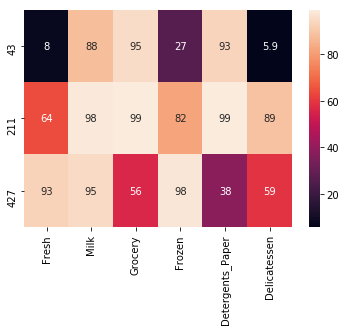

In [50]:
# Advice : Ranking check in the dataset.
import seaborn as sns

percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
sns.heatmap(percentiles_samples, annot=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:

The 3 choosen samples represent 3 kind of customer with different purchasing power. The customer indices (corresponding to the Row in the dataset) selected are : 
 * '43' for the customer could be considered as a mini market.
 * '211' for the customer could be considered as a restaurant.
 * '427' for the customer could be considered as a whole sale retailer.

Looking at the annual expense of each product category (plot above), the customer[43] is probably a mini market because they don't stock a lot a product. When we look at the annual expense for fresh, frozen, delicatessen products, they are under the annual mean value. They sell mainly the grocery, the milk and the detergent_paper, but the expenses are not higher than 2 others customers selected. 

Looking at the customer[211] that is probably a restaurant, because the annual expense for fresh, frozen, delicatessen products are around the annual mean values. Compared to the 2 others customers, the annual expense of the grocery, the milk and the detergent_paper higher. As a restaurant, you use mainly grocery, the milk and the detergent_paper for the cleaning and for the customers. Fresh and/or frozen food with delicatessens are povided but not in the same quantity due to the small life of the product.

Looking at the customer[427] that is probably a whole sale retailer, because the annual expense for fresh, frozen products are above the annual mean values. Compared to the 2 others customers, the annual expense of the grocery and the detergent_paper are lower and under the mean values. As a whole sale retailer, you provide mainly fresh and/or frozen food, grocery to small market. You just sell, so less cleaning.

Those 3 selected customers give indication for the kind's establishments.

**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [52]:
# Advice test: run 100 times R2 score w/o random_state to make an average of R2 score

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
score=[]

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis = 1)
# display(new_data)
new_data_Detergents_Paper_Res=data['Detergents_Paper']
# print(new_data_Detergents_Paper_Res)
for i in range(100):
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_Detergents_Paper_Res, test_size=0.25)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)
    y_test_regressor=regressor.predict(X_test)
    # TODO: Report the score of the prediction using the testing set
    score.append(r2_score(y_test,y_test_regressor))
# score=np.mean(score)
# print(score)
print("Model has a coefficient of determination, R^2, of {:.3f} after 100 iteration.".format(np.mean(score)))

Model has a coefficient of determination, R^2, of 0.675 after 100 iteration.


In [53]:
# Advice test : Advice : run 100 times R2 score w/o random_state to make an average of R2 score
# Check for every features
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

ProductList=data.keys()
for ProductName in ProductList:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    # new_data = data.drop('Detergents_Paper', axis = 1)
    new_data = data.drop(ProductName, axis = 1)
    # display(new_data)
    new_data_Res=data[ProductName]
    score =[]
    for i in range(100):        
        # print(new_data_Detergents_Paper_Res)
        # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
        # Set a random state.
        X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_Res, test_size=0.25)

        # TODO: Create a decision tree regressor and fit it to the training set
        regressor = DecisionTreeRegressor()
        regressor.fit(X_train,y_train)
        y_test_regressor=regressor.predict(X_test)
        # TODO: Report the score of the prediction using the testing set
        score = r2_score(y_test,y_test_regressor)
    print("Product {} removed - Model has a coefficient of determination, R^2, of {:.3f}.".format(ProductName,np.mean(score)))



Product Fresh removed - Model has a coefficient of determination, R^2, of -1.962.
Product Milk removed - Model has a coefficient of determination, R^2, of 0.253.
Product Grocery removed - Model has a coefficient of determination, R^2, of 0.763.
Product Frozen removed - Model has a coefficient of determination, R^2, of -0.025.
Product Detergents_Paper removed - Model has a coefficient of determination, R^2, of 0.605.
Product Delicatessen removed - Model has a coefficient of determination, R^2, of -2.209.


In [56]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# new_data = data.drop('Detergents_Paper', axis = 1)
new_data = data.drop('Detergents_Paper', axis = 1)
# display(new_data)
new_data_Detergents_Paper_Res=data['Detergents_Paper']
# print(new_data_Detergents_Paper_Res)
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_Detergents_Paper_Res, test_size=0.25, random_state=1)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)
y_test_regressor=regressor.predict(X_test)
# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test,y_test_regressor)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.815.


In [57]:
# Check for every features
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

ProductList=data.keys()
for ProductName in ProductList:
#     print(ProductName)
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    # new_data = data.drop('Detergents_Paper', axis = 1)
    new_data = data.drop(ProductName, axis = 1)
    # display(new_data)
    new_data_Res=data[ProductName]
    # print(new_data_Detergents_Paper_Res)
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_data_Res, test_size=0.25, random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train,y_train)
    y_test_regressor=regressor.predict(X_test)
    # TODO: Report the score of the prediction using the testing set
    score = r2_score(y_test,y_test_regressor)
    print("Product {} removed - Model has a coefficient of determination, R^2, of {:.3f}.".format(ProductName,score))



Product Fresh removed - Model has a coefficient of determination, R^2, of -0.923.
Product Milk removed - Model has a coefficient of determination, R^2, of 0.516.
Product Grocery removed - Model has a coefficient of determination, R^2, of 0.796.
Product Frozen removed - Model has a coefficient of determination, R^2, of -0.650.
Product Detergents_Paper removed - Model has a coefficient of determination, R^2, of 0.815.
Product Delicatessen removed - Model has a coefficient of determination, R^2, of -0.429.


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:

The first guess was to predict the 'Detergents_Paper' feature, because it seemed to indicate the customer habit for classification. Based on the expense of the Detergents_Paper, a customer could probably be classified as a retailer (because you just sell, so less cleaning), or a restaurant (you need more detergent, paper to keep the place clean) or other establishments possibles.

However, the R2 score calculated for Detergents_Paper is 0.815 (that means it captures the variation of the dataset). Considering the relevance of the feature, it is not an important feature.

Looking at other features like Fresh or frozen, it shows negative R2 score, that could be condisered as relevant to classify customers spending habits.

**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


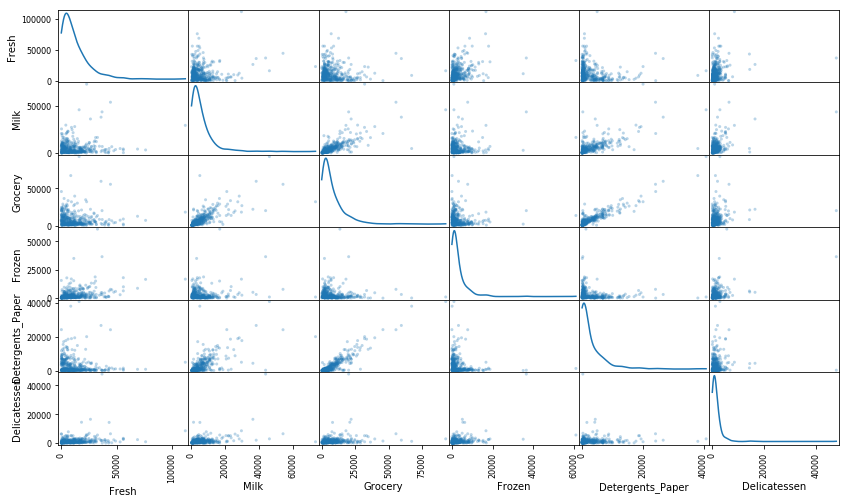

In [58]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


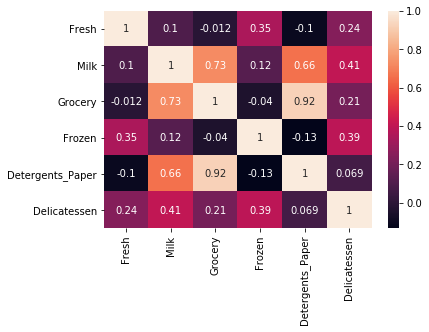

In [59]:
import seaborn as sns
data.corr()
print(data.corr())
ax = sns.heatmap(data.corr(), annot=True)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


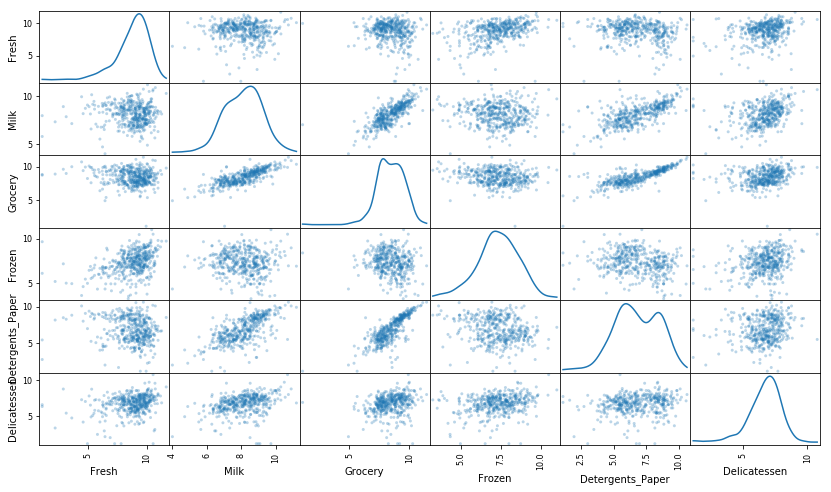

In [60]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [61]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.44572,9.314250,10.085726,6.668228,9.162095,4.276666
1,9.40253,10.251535,10.588955,8.462948,9.873544,7.962067
2,10.34213,9.722385,8.599510,9.621257,6.084499,7.058758


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](https://www.kdnuggets.com/2017/01/3-methods-deal-outliers.html): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [62]:
# Init
from collections import Counter
outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    RemoveList=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    outliers  = np.concatenate((outliers, RemoveList), axis=None).astype(int)
    print("{} data points as outliers.".format(len(RemoveList)))
    print('feature',feature,'Q1 - step = ',Q1 - step,'Q3 + step = ',Q3 + step)

G=Counter(outliers)    
print(G)    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
# display(good_data)

print('log_data.shape',log_data.shape)
print('good_data.shape',good_data.shape)
print('{} outliers removed'.format(log_data.shape[0]-good_data.shape[0]) )

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


16 data points as outliers.
feature Fresh Q1 - step =  5.51455083361 Q3 + step =  12.2705718166
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


4 data points as outliers.
feature Milk Q1 - step =  5.01673296722 Q3 + step =  11.1987283614
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


2 data points as outliers.
feature Grocery Q1 - step =  5.27575998758 Q3 + step =  11.672709891
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


10 data points as outliers.
feature Frozen Q1 - step =  4.26035024816 Q3 + step =  10.5252235842
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


2 data points as outliers.
feature Detergents_Paper Q1 - step =  1.45874266385 Q3 + step =  12.3636993597
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


14 data points as outliers.
feature Delicatessen Q1 - step =  3.76959400251 Q3 + step =  9.74900908097
Counter({154: 3, 65: 2, 66: 2, 128: 2, 75: 2, 81: 1, 95: 1, 96: 1, 171: 1, 193: 1, 218: 1, 304: 1, 305: 1, 338: 1, 353: 1, 355: 1, 357: 1, 412: 1, 86: 1, 98: 1, 356: 1, 38: 1, 57: 1, 145: 1, 175: 1, 264: 1, 325: 1, 420: 1, 429: 1, 439: 1, 161: 1, 109: 1, 137: 1, 142: 1, 183: 1, 184: 1, 187: 1, 203: 1, 233: 1, 285: 1, 289: 1, 343: 1})
log_data.shape (440, 6)
good_data.shape (398, 6)
42 outliers removed


In [63]:
# Correction adviced : 2 times IQR to reduce the number of data removed
# Init
from collections import Counter
outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
#     step = 1.5 * (Q3-Q1)
    step = 2.0 * (Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # OPTIONAL: Select the indices for data points you wish to remove
    RemoveList=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    outliers  = np.concatenate((outliers, RemoveList), axis=None).astype(int)
    print("{} data points as outliers.".format(len(RemoveList)))
    print('feature',feature,'Q1 - step = ',Q1 - step,'Q3 + step = ',Q3 + step)

G=Counter(outliers)    
print(G)    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
# display(good_data)

print('log_data.shape',log_data.shape)
print('good_data.shape',good_data.shape)
print('{} outliers removed'.format(log_data.shape[0]-good_data.shape[0]) )

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918
357,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134


8 data points as outliers.
feature Fresh Q1 - step =  4.67004821074 Q3 + step =  13.1150744394
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.43294,4.007333,4.919981,4.317488,1.94591,2.079442


1 data points as outliers.
feature Milk Q1 - step =  4.24398354295 Q3 + step =  11.9714777857
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


1 data points as outliers.
feature Grocery Q1 - step =  4.47614124964 Q3 + step =  12.472328629
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


1 data points as outliers.
feature Frozen Q1 - step =  3.47724108116 Q3 + step =  11.3083327512
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


0 data points as outliers.
feature Detergents_Paper Q1 - step =  0.0956230768735 Q3 + step =  13.7268189467
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910
285,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372


10 data points as outliers.
feature Delicatessen Q1 - step =  3.0221671177 Q3 + step =  10.4964359658
Counter({154: 2, 65: 1, 66: 1, 95: 1, 96: 1, 218: 1, 338: 1, 357: 1, 412: 1, 75: 1, 420: 1, 109: 1, 128: 1, 142: 1, 183: 1, 184: 1, 187: 1, 203: 1, 233: 1, 285: 1})
log_data.shape (440, 6)
good_data.shape (420, 6)
20 outliers removed


In [64]:
# Check if selected indices are not removed 
indices_check = [43,211,427] #[183,129,400]
# Create a DataFrame of the chosen samples
samples_check = pd.DataFrame(data.loc[indices_check], columns = data.keys())
# display(samples_check)
# print('Check sample not removed from log_data')
data_check = data.drop(data.index[outliers])
# display(data_check)
for j in indices_check:
    presence_check=j in data_check.index
    print('Presence of indice {} in data without outliers : {}'.format(j,presence_check))
# ----------------


Presence of indice 43 in data without outliers : True
Presence of indice 211 in data without outliers : True
Presence of indice 427 in data without outliers : True


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:

Using Turkey's method with a outlier step 1.5 times the interquartile, we have 42 data points considered as outliers. Which reprensents about 10% of the dataset. Some points are considered outliers in more than 1 feature. counter : ('154': 3, '65': 2, '66': 2, '128': 2, '75': 2).

There are data points considered outliers in every features. There is a low number of outliers for features having a degree of correlation : 4 outliers for the milk, 2 outliers for the grocery and 2 outliers for the detergent_paper.

Reducing the number of outliers is necessary for the next step of the project, because of the important number of outliers. Increasing the outlier step is one of possible options. Outlier step at 2.0 gives 20 datapoints considered as outliers, around 4.5% of the dataset.  

These outliers should be removed to the data set because during the optimization step of the K-mean algorithm if it is use, the minimization of the total quadratic distance of the cluster center to the points won't be optimized.


**

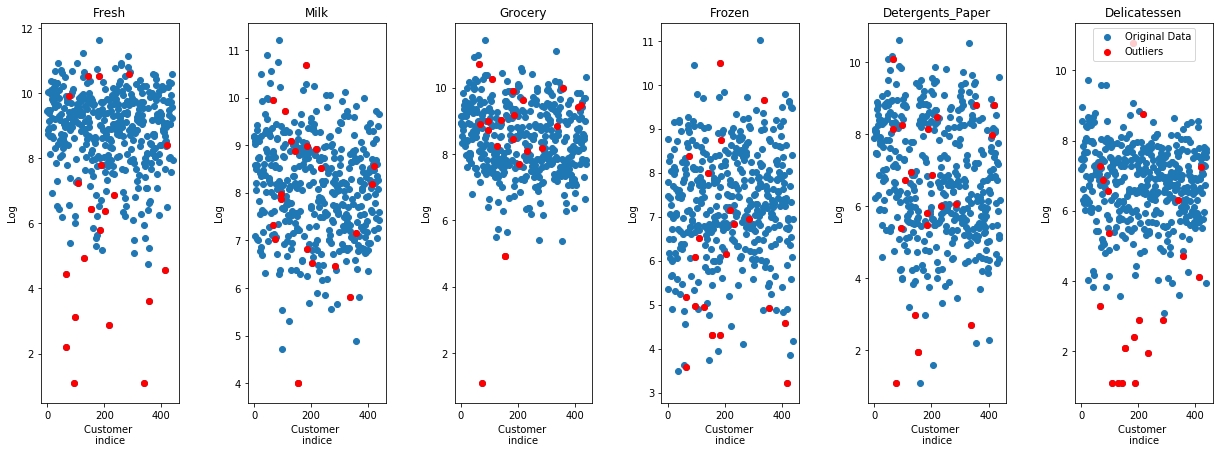

In [65]:
# Visualization of outliers among data
#-----------------
# Create figure
fig, ax = plt.subplots(1, len(data.keys()), figsize = (21,7))
# Plot data
for k, ProductCat in enumerate(data.keys()):
    ax[k].scatter(data.index,np.log(data[ProductCat].values), label='Original Data')
    ax[k].scatter(data.index[outliers],np.log(data[ProductCat].loc[outliers.astype(int)]),color='r',label='Outliers')  
    ax[k].set_title(ProductCat)
    ax[k].set_ylabel('Log')
    ax[k].set_xlabel('Customer \nindice')
fig.subplots_adjust(wspace=0.5)
plt.legend(loc='upper center')
plt.show()


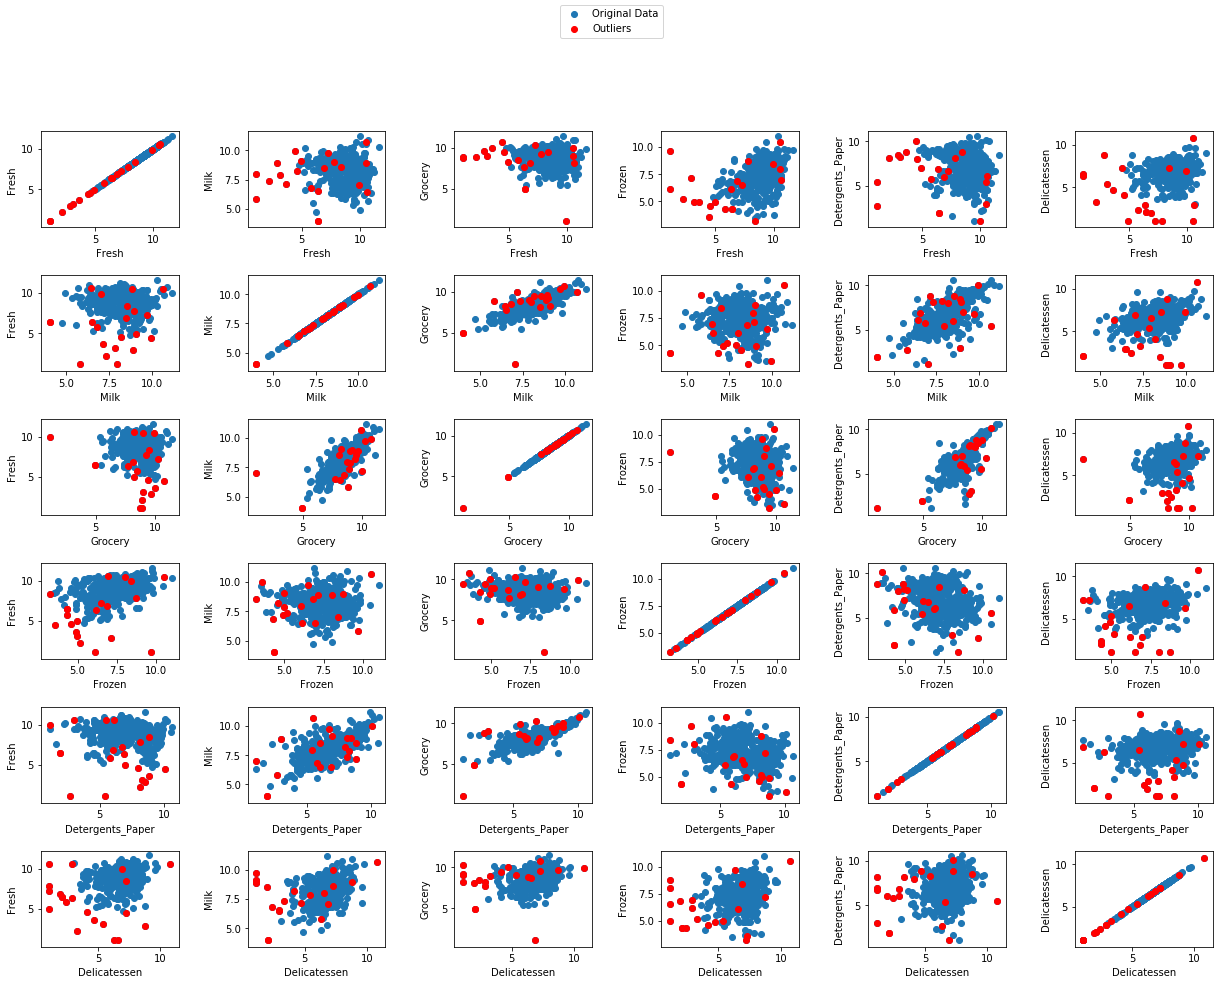

In [66]:
# Check outliers among data for cross features plot
# Create figure
fig, ax = plt.subplots(len(data.keys()), len(data.keys()), figsize = (21,15))
# Plot data
for n, ProductCatX in enumerate(data.keys()):
    for k, ProductCatY in enumerate(data.keys()):
        ax[n,k].scatter(np.log(data[ProductCatX].values),np.log(data[ProductCatY].values), label='Original Data')
        ax[n,k].scatter(np.log(data[ProductCatX].loc[outliers.astype(int)]),np.log(data[ProductCatY].loc[outliers.astype(int)]),color='r',label='Outliers')    
        ax[n,k].set_ylabel(ProductCatY)
        ax[n,k].set_xlabel(ProductCatX)
handles,labels = ax[n,k].get_legend_handles_labels()    
fig.subplots_adjust(wspace=0.5,hspace=0.5)
fig.legend(handles,labels,loc='upper center')
plt.show()


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

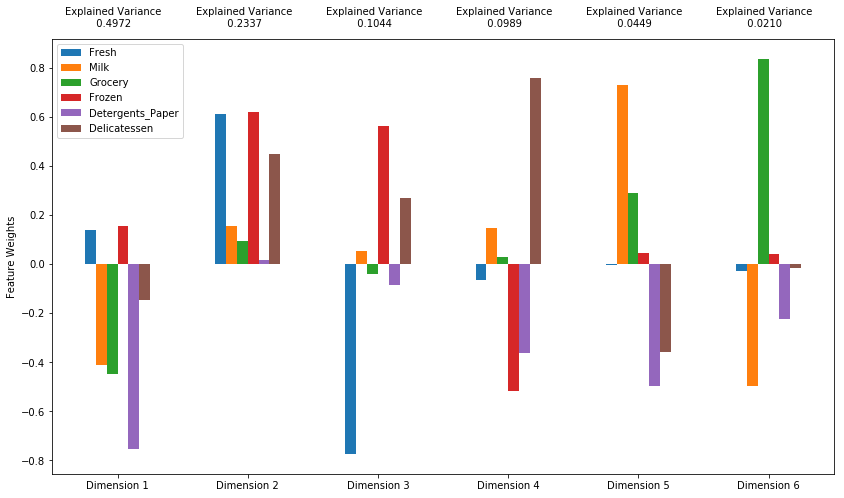

In [67]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(data.keys()),random_state=20)
pca.fit(good_data)
# print('pca.components_\n',pca.components_)
# print('pca.explained_variance_ratio_\n',pca.explained_variance_ratio_)
# print('pca.explained_variance_\n',pca.explained_variance_)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

## **Answer:

- The explained variance ratio for the 6 dimensions (or components) above are ranked from the highest ratio to the lowest. 

- Explained variance ratio for Dimension 1 (49.72%) and Dimension 2 (23.37%) represent a total of 73.09 %. Those 2 dimensions have the highest variance ratio than other dimensions. It means that the projected data on dimension 1 represent 49.72% of the total variance of all dimension, and for dimension 2, 23.37%.

- Looking at the Dimentions 3 (10.44%) and Dimension 4 (9.89%), the cumulative sum reaches 93.42%.

- Looking at these weights for each dimension, they represent the pruchase of features. More the weight value is higher (in a positive or negative way), more the purchase value will be important. And inversely, lower is the weight value, lower will be the pruchase value of a feature. Negative weight means that the feature is inversely correlated. Increasing one positive feature will decreases te other feature if it has a negative weight. The dimension tends to give a view of a customer expenses habit that would likely separate this king of customer among others.

- Dimension investigation : 
    * Dimension 1 : It is well represented by Detergent_paper which has an important weight (around -0.8), and followed by Milk, grocery with a weight around -0.4. Delicatessen is lightly representative in dimension 1, with Fresh and Frozen with a weight within -0.2/+0.2 range. The Dimension 1 seems to represent the characteristics of a market.

    * Dimension 2 : It is well represented by Fresh, frozen with a weight around 0.6, and delicatessen with a wieght around 0.4. Delicatessen has a very low representativity, around 0. Milk and grocery have a low weight, around 0.1. The Dimension 2 seems to represent the characteristics of a delis.

    * Dimension 3 : It is well represented by Fresh which has a hight weight value, around 0.8. Also it is the same for frozen, with a weight around 0.6 and delicatessen with a weight around 0.3. Detergent paper has a low weight, around -0.1. Milk, grocery features have a very low weight, close to 0. The Dimension 3 seems to represent the characteristics of a restaurant.
    
    * Dimension 4 : It is well represented by delicatessen which has hight weight value, around 0.8. It is followed by frzen and Detergent paper with a weight of -0.5, -0.4. Milk has a weight of 0.1 and, fresh and grocery have a low weight close to 0. The Dimension 4 seems to represent the characteristics of a market.
**

cumsum pca.explained_variance_ratio_ [ 0.49717672  0.73085441  0.83523664  0.93418325  0.97904974  1.        ]


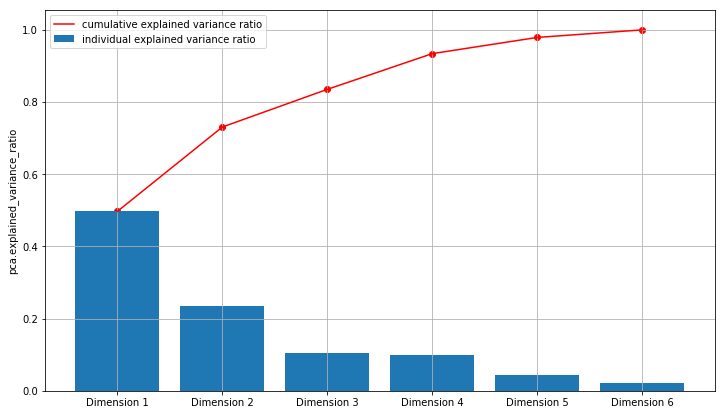

In [68]:
# Check individual and cumulative explained variance ratio
print('cumsum pca.explained_variance_ratio_',np.cumsum(pca.explained_variance_ratio_))
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
plt.figure(figsize=(12,7))
plt.bar(np.arange(len(data.keys())),pca.explained_variance_ratio_,label='individual explained variance ratio')
plt.scatter(np.arange(len(data.keys())),np.cumsum(pca.explained_variance_ratio_),color='r')
plt.plot(np.arange(len(data.keys())),np.cumsum(pca.explained_variance_ratio_),color='r',label='cumulative explained variance ratio')
plt.xticks(np.arange(len(data.keys())), dimensions)
# plt.text(np.arange(len(data.keys())),np.cumsum(pca.explained_variance_ratio_),np.cumsum(pca.explained_variance_ratio_) )
plt.ylabel('pca.explained_variance_ratio')
plt.legend()
plt.grid(True)



### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [69]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-3.0802,-2.6521,0.6187,-2.0190,1.0511,0.3538
1,-4.0622,2.1417,0.3035,-0.4441,0.2833,0.0885
2,0.3393,2.7020,0.3528,-0.5499,1.5692,-0.4419


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [70]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2,random_state=20)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
# samples_reduced_data = pd.DataFrame(pca_samples, columns = ['Dimension 1', 'Dimension 2'])
# print(samples_reduced_data)
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
# print(reduced_data)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [71]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


,Dimension 1,Dimension 2
0,-3.0802,-2.6521
1,-4.0622,2.1417
2,0.3393,2.7020


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

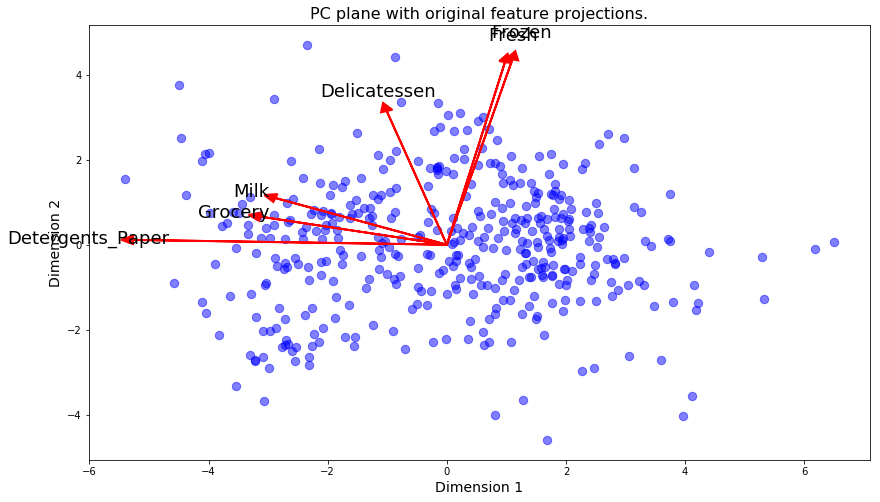

In [72]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:


- K-Means advantages : . It is easy to implement.
                       . With large number of variables, it may be faster in computation the a hierarchical clustering (if K is small).
                       . Easy to interpret clustering results.
                       . Link : https://www.quora.com/What-are-the-advantages-of-K-Means-clustering

- Gaussian Mixture Model advantage : . It is the fastest algorithm for learning mixture models
                                     . As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
                                     . Cluster shape flexibility.
                                     . Provide a Soft clustering (A sample membership of multiple clusters)
                                     . Link : https://scikit-learn.org/stable/modules/mixture.html

- Based on global observations, the Gaussian mixture algorithm seems to be more appropriate because it provides soft clustering (clusters may overlap), and also the ability of a cluster shape flexibility. The Kmeans is not appropriate because of the fact that a data belong to a cluster or not (hard clustering). The distribution of the data, in biplot, doesn't seem to have a distinct split of data for 'clean' clustering, so that could give a classification of a data.
**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

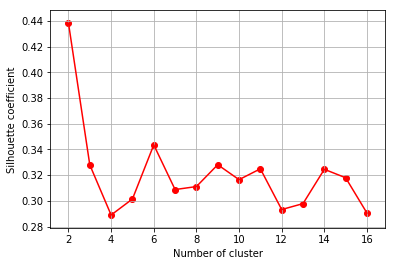

In [73]:
# 
from sklearn import mixture
from sklearn import metrics
def GMM_Silhouette_score(n_components,reduced_data,pca_samples):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = mixture.GaussianMixture(n_components=n_components,random_state=20).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # print(preds)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # print('centers coordinates \n ',centers)

    # TODO: Predict the cluster for each transformed sample data point
    # sample_preds = clusterer.predict(samples_reduced_data)
    sample_preds = clusterer.predict(pca_samples)
    # print(sample_preds)
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data, preds)
    # print(score)
    return score

Cluster_range=np.arange(2,17,1)
Cluster_score=[GMM_Silhouette_score(n,reduced_data,pca_samples) for n in Cluster_range]
plt.plot(Cluster_range,Cluster_score,color='r')
plt.scatter(Cluster_range,Cluster_score,color='r')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouette coefficient')
plt.grid(True)

In [74]:
# 2 clusters for maximum silhouette coefficient
clusterer = mixture.GaussianMixture(n_components=2,random_state=20).fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
# sample_preds = clusterer.predict(samples_reduced_data)
sample_preds = clusterer.predict(pca_samples)
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds)
print('Silhouette score for 2 clusters = ', score.round(2))

Silhouette score for 2 clusters =  0.44


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:

A variation of the number of cluster is done in order to see the evolution of silhouette coefficient and find the best scoring. It starts with 2 clusters minimum to get a classification and ends with 17 clusters . 

Based on the plot number of cluster Vs Silhouette coefficient, 2 clusters give the best silhouette coeffient with a scoring of 0.45.

**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

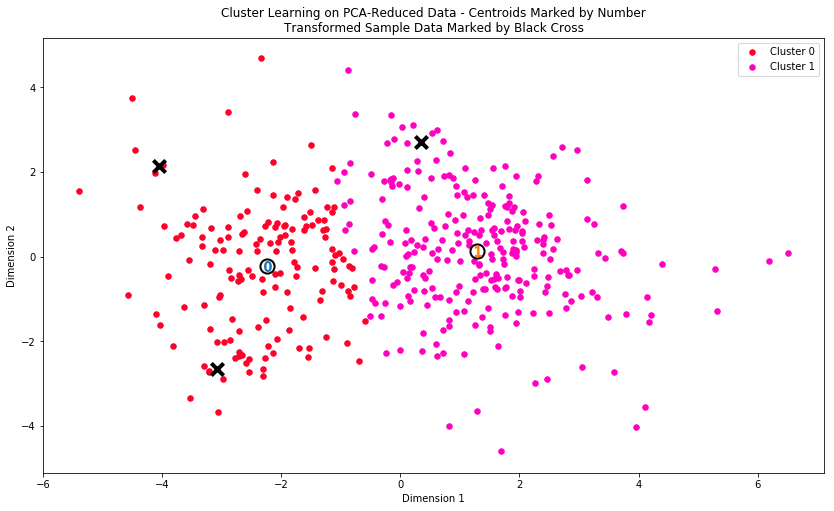

In [75]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)
# vs.cluster_results(reduced_data, preds, centers, samples_reduced_data)



### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4506.0,8220.0,12304.0,952.0,4848.0,1090.0
Segment 1,9157.0,2048.0,2640.0,2066.0,346.0,770.0


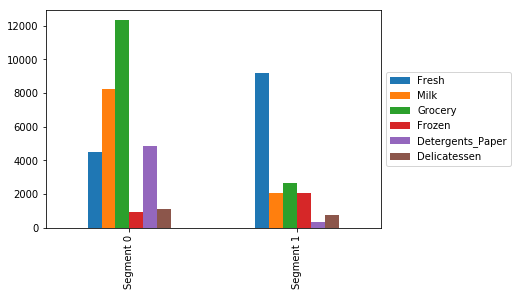

In [77]:

# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Plot dataframe
true_centers.plot(kind='bar').legend(loc='center left', bbox_to_anchor=(1, 0.5))



### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:

Based on the results of PCA calculation/analysis, 2 clusters or segments stand out. The segment will represent the type of establishment.

Segment 0 will be considered as wholesale retailer due to the expense of milk, grocery and detergent_parper above the mean, and expenses for delicatessen and frozen are under the mean. 

Segment 1 will be considered as a restaurant or delis due to the expense of fresh, frozen and delicatessen close to the mean. 

**

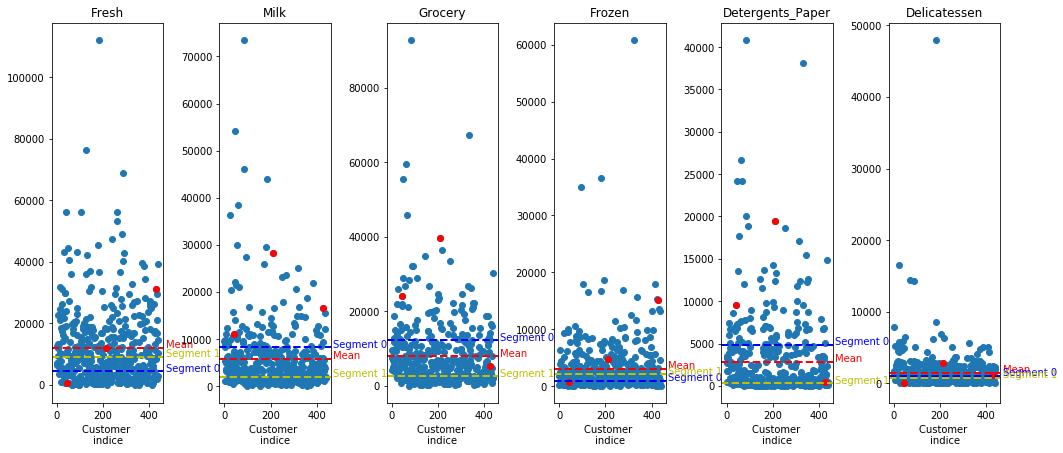

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
43,630.0,11095.00,23998.00,787.00,9529.00,72.00
211,12119.0,28326.00,39694.00,4736.00,19410.00,2870.00
427,31012.0,16687.00,5429.00,15082.00,439.00,1163.00
Mean,12000.3,5796.27,7951.28,3071.93,2881.49,1524.87
Segment 0,4506.0,8220.00,12304.00,952.00,4848.00,1090.00
Segment 1,9157.0,2048.00,2640.00,2066.00,346.00,770.00


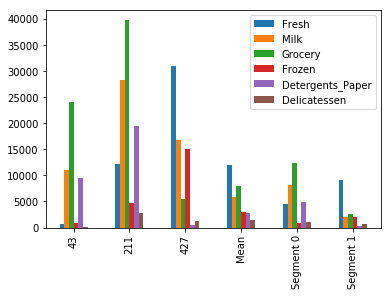

In [78]:
import matplotlib.pyplot as plt
import numpy as np
# Check selected indices
indices_check = [43,211,427] #[183,129,400]
# Create a DataFrame of the chosen samples
samples_check = pd.DataFrame(data.loc[indices_check], columns = data.keys())
#-----------------
# Create figure
fig, ax = plt.subplots(1, len(data.keys()), figsize = (17,7))
# Plot data
for k, ProductCat in enumerate(data.keys()):
    ax[k].scatter(np.arange(0,data.shape[0],1),data[ProductCat].values)
    ax[k].scatter(indices_check,samples[ProductCat].values,color='r')
   
    ax[k].axhline(np.mean(data[ProductCat].values),linestyle='--',linewidth=2, color='r')
    ax[k].text(470, np.mean(data[ProductCat].values), "Mean", size=10, color='r')    
    ax[k].axhline(true_centers.at['Segment 0',ProductCat],linestyle='--',linewidth=2, color='b')
    ax[k].text(470, true_centers.at['Segment 0',ProductCat], "Segment 0", size=10, color='b') 
    ax[k].axhline(true_centers.at['Segment 1',ProductCat],linestyle='--',linewidth=2, color='y')
    ax[k].text(470, true_centers.at['Segment 1',ProductCat], "Segment 1", size=10, color='y')     
    ax[k].set_title(ProductCat)
    ax[k].set_xlabel('Customer \nindice')
    # ax[k].set_ylabel('annual spending amounts', multialignment='center')

fig.subplots_adjust(wspace=0.5)
plt.show()
#-----------------
# 
MeanData=[np.mean(data[ProductCat].values) for ProductCat in data.keys() ]
MeanData=np.reshape(np.asarray(MeanData),(1,6))
df2 = pd.DataFrame(MeanData ,index = ['Mean'], columns = data.keys())
display(pd.concat([samples_check.round(2), df2.round(2), true_centers.round(2)]))
df3=pd.concat([samples_check.round(2), df2.round(2), true_centers.round(2)])
df3.plot(kind="bar")

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [79]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [80]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Customer", indices[i], "predicted to be in Segment", pred)

Customer 43 predicted to be in Segment 0
Customer 211 predicted to be in Segment 0
Customer 427 predicted to be in Segment 1


**Answer:

The selected customer for sample : 

For customer 43, the prediction gives an association to a restaurant (Segment 0). It corresponds to the first guess that was a mini market, because of the important expenses for milk, grocery and detergent paper, and a low expense for the other features.

For customer 211, the prediction gives an association to a restaurant (Segment 0). It corresponds more to segment 0 due when we look at the expense distributionof each features. It doesn't correspond to the first guess which was a restaurant initialy.

For customer 427 the prediction gives an association to a wholesale retailer (Segment 1). It corresponds more to segment 1 due when we look at the expense distributionof each features. It doesn't correspond  to the first guess that was a whole sale retailer. 

We can notice that the pattern (or feature distribution) of each segment associated permits now to classify each customers correctly.

**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:

The wholesale distributor can use the customer segment to identify what are the main expenses and how much they spend, in order to evaluate the impact on them there will be a change in the number of delivery day per week for the A/B tests. 

To proceed the A/B tests :

- Experimentation is done on a small set of samples from the population. 4 groups of samples are defined (Group0a Vs Group0b are similar, Group1a Vs Group1b are similar) : 
    Group0a - Sample Customer segment0 without delivery day change
    Group0b - Sample Customer segment0 with delivery day change
    Group1a - Sample Customer segment1 without delivery day change
    Group1b - Sample Customer segment1 with delivery day change

- Testing and Comparison :
    Test the delivery change for Group0b and Group1b, and evaluate the effect. The comparison Group0a Vs Group0b and     Group1a Vs Group1b could be done via a customer servey and/or the expense habit. 
    
- Result analysis : 
    Customer from Group0b or Group1b giving bad survey feedback and/or expense habit decrease than Customer from Group0a or Group1a, means the delivery day change has a negative impact. Inversely, if the feedback is good and/or the expense habit is stable or increase, it means the delivery day change has a positive impact


If the wholesale distributor reduces the number of delivery days per week, there will be impact on both segments, but not equally. 

Looking at customer : 

Customer associated to segment 0 has the main expenses for fresh products (it represents around 54% of total expense of all features). The other expenses represents 46% of total expense of all features. That means, his main business is based on fresh products and prefer to sell fresh products as fresh as possible. This customer will probably be the most impacted because of his expense is based mainly on fresh product only.

Customer associated to segment 1 has his main expenses mainly focused on the grocery, then milk and then fresh. The others (delicatessen, frozen) are less representative in the expenses. That means the customer has more flexibility because main preducts bought have a better life time than fresh products. This customer will have an impact also but not as much as customer associated to segment 0 because of the main expenses done on 3 categories of products.


**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:

To label the new customer, the wholesale distributor can use supervised machine learning technics. The features would be the anticipated annual expenses of the products and the target would be the segment classification.

**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

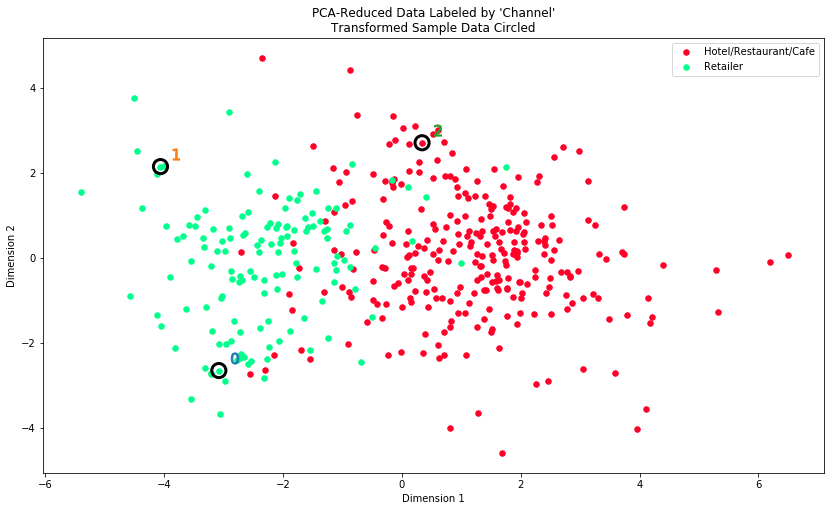

In [81]:
# Display the clustering results based on 'Channel' data
# print(reduced_data, outliers, pca_samples)
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:

- The clustering algorithm and the number of clusters chosen correspond.  The underlying distribution (channel feature) is , Cluster 1 for Retailer and cluster 0 for Hotel/Restaurant/Cafe.

- The classification is not purely 'Retailers' or 'Hotels/Restaurants/Cafes' because there is an overlap between the 2 clusters. This is due to the Gaussian Mixture algorithm allowing this overlap. 

- This classifiation corresponds but in an inverse way. For the initial guess customer segment, segement 0 definition was based on the fact that a retailer sells everything (like a local supermarket) , compared to segment 1 that the initial guess was a restaurant. It was based on the important fresh feature that is the main expense for a restaurant or a deli.


**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.